In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [12]:
with open("./result.json", "r") as file:
    result_file = json.loads(file.read())

In [13]:
result_df = pd.json_normalize(result_file['results'])
result_df.rename(columns=lambda c: c.replace('config.', ''), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df.head()

,max_possible_throughput,expected_throughput,avg_throughput,controller,mission_size,num_agents,sensor_generation_frequency,sensor_generation_probability,sensor_packet_lifecycle,maximum_simulation_steps,...,learning_rate,gamma,qtable_initialization_value,qtable_file,qtable_format,training,step_by_step,plots,verbose,repetitions
0,66.333333,39.8,1.162343,<class 'QLearning.QLearning'>,200,4,3,0.6,25,1000,...,0.1,0.99,0,0.pickle,sparse,True,False,False,False,1
1,66.333333,39.8,18.349933,<class 'Dadca.Dadca'>,200,4,3,0.6,25,100000,...,0.1,0.99,0,17.pickle,sparse,True,False,False,False,1
2,66.333333,39.8,3.405763,<class 'QLearning.QLearning'>,200,4,3,0.6,25,100000,...,0.1,0.99,0,18.pickle,sparse,True,False,False,False,2
3,66.333333,39.8,0.399002,<class 'QLearning.QLearning'>,200,4,3,0.6,25,100000,...,0.1,0.99,0,18.pickle,sparse,False,False,False,False,2
4,66.333333,39.8,18.339051,<class 'Dadca.Dadca'>,200,4,3,0.6,25,100000,...,0.1,0.99,0,19.pickle,sparse,True,False,False,False,2


In [14]:
variable_columns = result_file['campaign_variables']
variable_columns

['maximum_simulation_steps', 'repetitions', 'controller', 'training']

In [15]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,max_possible_throughput,expected_throughput,avg_throughput,controller,mission_size,num_agents,sensor_generation_frequency,sensor_generation_probability,sensor_packet_lifecycle,...,learning_rate,gamma,qtable_initialization_value,qtable_file,qtable_format,training,step_by_step,plots,verbose,repetitions
0,0,66.333333,39.8,1.162343,<class 'QLearning.QLearning'>,200,4,3,0.6,25,...,0.1,0.99,0,0.pickle,sparse,True,False,False,False,1
1,1,66.333333,39.8,18.349933,<class 'Dadca.Dadca'>,200,4,3,0.6,25,...,0.1,0.99,0,17.pickle,sparse,True,False,False,False,1
2,2,66.333333,39.8,3.405763,<class 'QLearning.QLearning'>,200,4,3,0.6,25,...,0.1,0.99,0,18.pickle,sparse,True,False,False,False,2
3,3,66.333333,39.8,0.399002,<class 'QLearning.QLearning'>,200,4,3,0.6,25,...,0.1,0.99,0,18.pickle,sparse,False,False,False,False,2
4,4,66.333333,39.8,18.339051,<class 'Dadca.Dadca'>,200,4,3,0.6,25,...,0.1,0.99,0,19.pickle,sparse,True,False,False,False,2


In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['expected_throughput'],
    name='Expected Throughput',
    hovertemplate='<b>Expected Throughput: %{y}</b><extra></extra>'
))


campaign_hovertemplate = '<b>Avg. Throughput: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['avg_throughput'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(len(result_df))],
   tickvals=[i for i in range(len(result_df))],
)

fig.show()

In [17]:
result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [18]:
fig = go.Figure()

campaign_hovertemplate = '<b>Score: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['score'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(24)],
   tickvals=[i for i in range(24)],
)

fig.show()

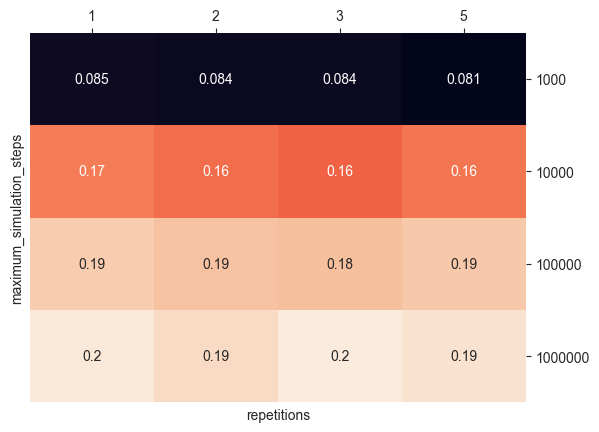

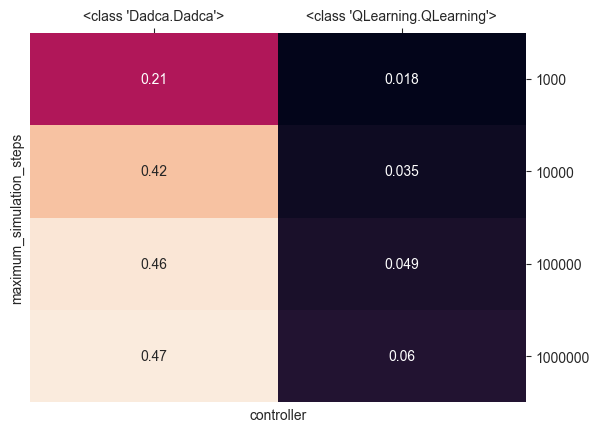

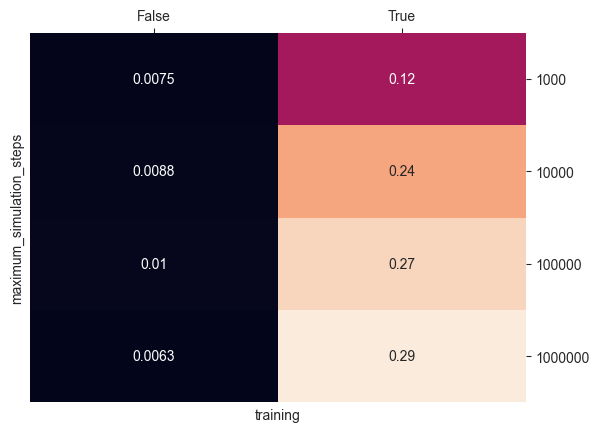

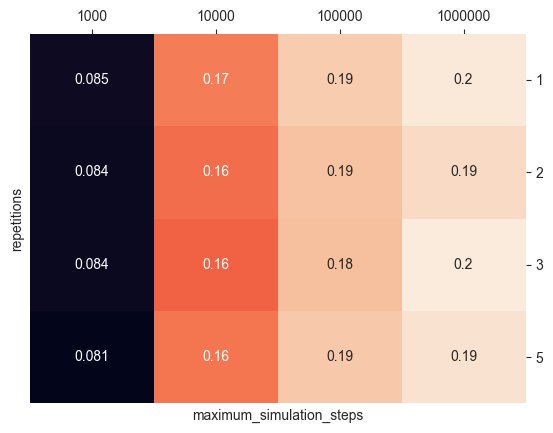

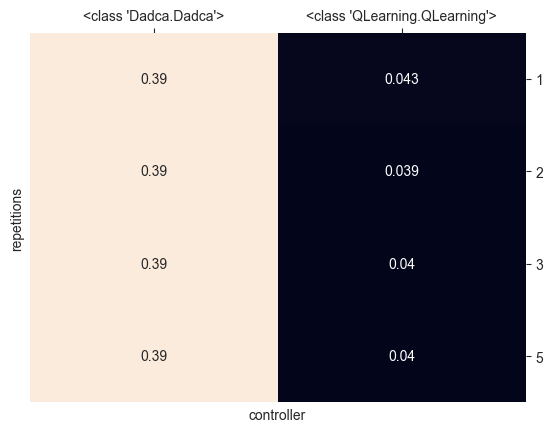

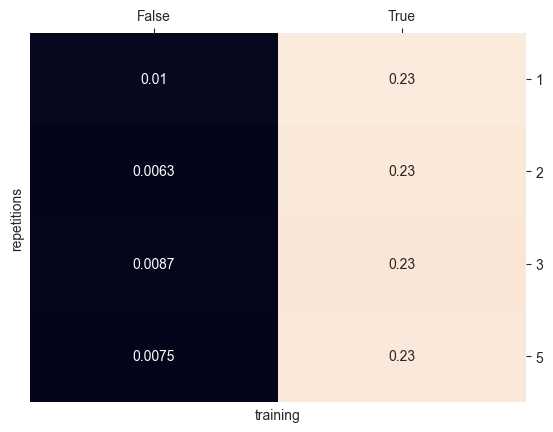

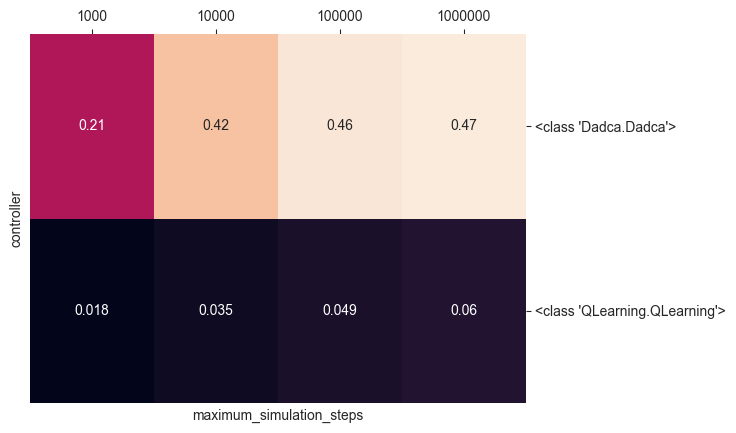

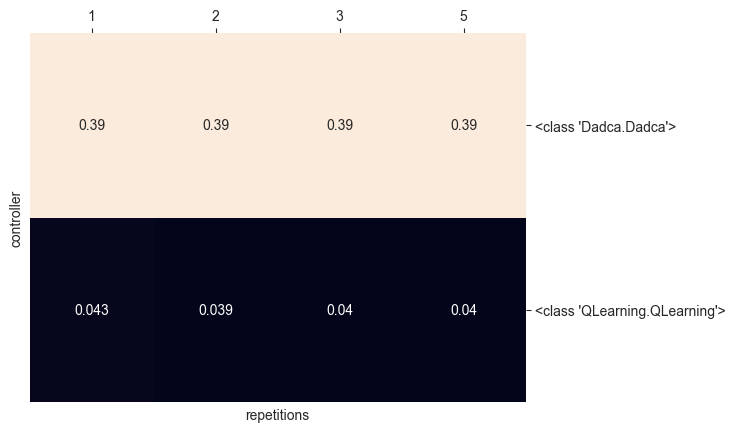

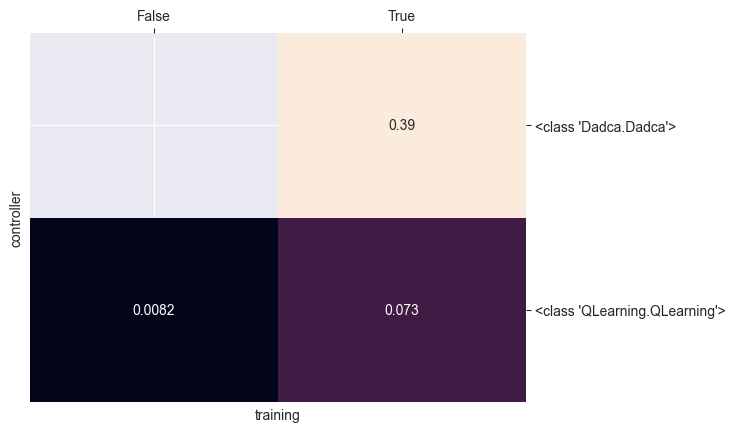

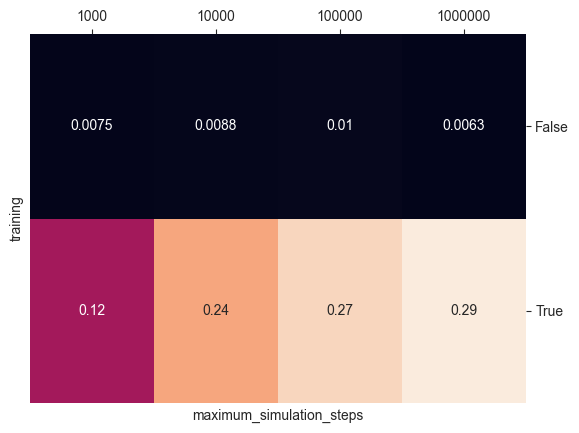

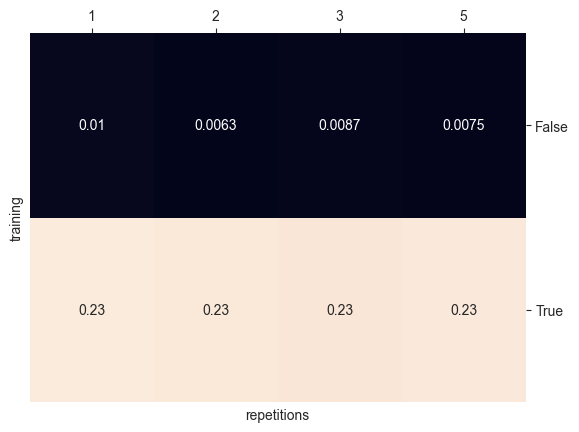

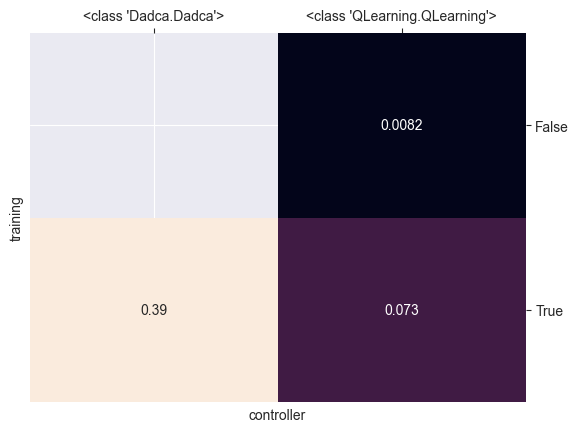

In [19]:
for column in variable_columns:
    for other_column in variable_columns:
        if other_column == column:
            continue
        df = result_df.pivot_table(values='score', columns=other_column, index=column)
        ax = sns.heatmap(df, annot=True, cbar=False)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.tick_params(axis="y", rotation=0)
        plt.show()

In [20]:
for column in variable_columns:
    for value in result_df[column].unique():
        print(f"{column} = {value}".ljust(60) + f"Avg Throughput: {result_df[result_df[column] == value]['score'].mean() :.2f}")
    print("\n")

maximum_simulation_steps = 1000                             Avg Throughput: 0.08
maximum_simulation_steps = 100000                           Avg Throughput: 0.19
maximum_simulation_steps = 1000000                          Avg Throughput: 0.20
maximum_simulation_steps = 10000                            Avg Throughput: 0.16


repetitions = 1                                             Avg Throughput: 0.16
repetitions = 2                                             Avg Throughput: 0.16
repetitions = 3                                             Avg Throughput: 0.16
repetitions = 5                                             Avg Throughput: 0.16


controller = <class 'QLearning.QLearning'>                  Avg Throughput: 0.04
controller = <class 'Dadca.Dadca'>                          Avg Throughput: 0.39


training = True                                             Avg Throughput: 0.23
training = False                                            Avg Throughput: 0.01




# Analysing Q Learning training performance

<Axes: xlabel='maximum_simulation_steps'>

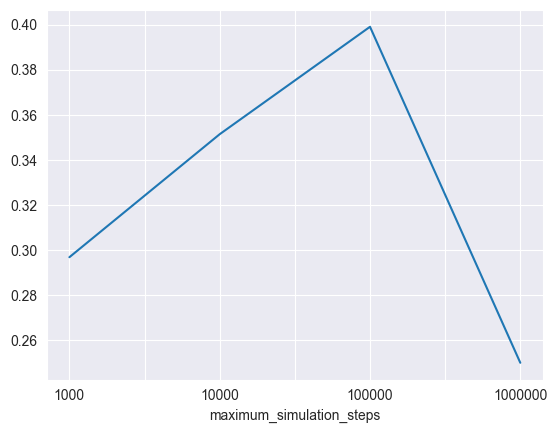

In [24]:
q_learning_testing = result_df[result_df['controller'].str.contains('QLearning') & (result_df['training'] == 'False')]
q_learning_testing.groupby('maximum_simulation_steps')['avg_throughput'].mean().plot()